# Test Data Generation
Script is to provide some test data for the trilateration algorithm.

The first section generates a random grid of shots, assigns some FBP value with some error. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt

#create sample points
dataX = pd.DataFrame(np.random.randint(0,5000,size=(1000,1)), columns=list('X'))
dataY = pd.DataFrame(np.random.randint(0,5000,size=(1000,1)), columns=list('Y'))
dataZ = pd.DataFrame(np.random.randint(-7,-5,size=(1000,1)), columns=list('Z'))
error = pd.DataFrame(np.random.randint(-15,15,size=(1000,1)), columns=list('E'))
data = pd.concat([dataX, dataY, dataZ, error], axis=1, sort=False)

#intial values
Xi=2500
Yi=2500
Zi=-100
Si=1535 


#distances to intial point with error
data['fbp'] = ((((data['X']-Xi)**2 + (data['Y']-Yi)**2 + (data['Z']-Zi)**2)**0.5)+(data['E']))/(Si + data['E'])

data.head()


,X,Y,Z,E,fbp
0,2696,4883,-7,-5,1.560689
1,4792,1539,-6,1,1.619851
2,680,325,-6,-10,1.854151
3,4062,4868,-7,6,1.845746
4,1593,930,-6,10,1.181615


The next section calculates the final actual point where the FBP falls by scaling.

In [2]:
#calculate the observed distance
data['observed_dist']=(data['fbp']*Si)

#calculated ranges
data['calc_ranges']=((data['X']-Xi)**2 + (data['Y']-Yi)**2 + (data['Z']-Zi)**2)**0.5

#scaling
data['scale']=data['observed_dist']/data['calc_ranges']

#diffs
data['diff_X']= data['X']-Xi
data['diff_Y']= data['Y']-Yi
data['diff_Z']= data['Z']-Zi

#scaling
data['diff_X_scaled']= (data['X']-Xi)*data['scale']
data['diff_Y_scaled']= (data['Y']-Yi)*data['scale']
data['diff_Z_scaled']= (data['Z']-Zi)*data['scale']

#Final
data['final_X']= -data['diff_X_scaled']+data['X']
data['final_Y']= -data['diff_Y_scaled']+data['Y']
data['final_Z']= -data['diff_Z_scaled']+data['Z']

#Final_Diff
data['final_diff']=((data['final_X']-Xi)**2 + (data['final_Y']-Yi)**2 + (data['final_Z']-Zi)**2)**0.5


data.head()

,X,Y,Z,E,fbp,observed_dist,calc_ranges,scale,diff_X,diff_Y,diff_Z,diff_X_scaled,diff_Y_scaled,diff_Z_scaled,final_X,final_Y,final_Z,final_diff
0,2696,4883,-7,-5,1.560689,2395.658227,2392.854780,1.001172,196,2383,93,196.229632,2385.791901,93.108958,2499.770368,2497.208099,-100.108958,2.803447
1,4792,1539,-6,1,1.619851,2486.471020,2487.090871,0.999751,2292,-961,94,2291.428771,-960.760493,93.976573,2500.571229,2499.760493,-99.976573,0.619851
2,680,325,-6,-10,1.854151,2846.121640,2837.580131,1.003010,-1820,-2175,94,-1825.478452,-2181.547051,94.282953,2505.478452,2506.547051,-100.282953,8.541509
3,4062,4868,-7,6,1.845746,2833.220258,2838.294735,0.998212,1562,2368,93,1559.207361,2363.766345,92.833729,2502.792639,2504.233655,-99.833729,5.074477
4,1593,930,-6,10,1.181615,1813.778795,1815.594944,0.999000,-907,-1570,94,-906.092723,-1568.429521,93.905971,2499.092723,2498.429521,-99.905971,1.816149


In [3]:
data.describe()

,X,Y,Z,E,fbp,observed_dist,calc_ranges,scale,diff_X,diff_Y,diff_Z,diff_X_scaled,diff_Y_scaled,diff_Z_scaled,final_X,final_Y,final_Z,final_diff
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2468.436000,2594.252000,-6.496000,-0.374000,1.249917,1918.622520,1918.375386,1.000151,-31.564000,94.252000,93.504000,-31.641609,94.264454,93.517996,2500.077609,2499.987546,-100.013996,3.467854
std,1438.268636,1453.758655,0.500234,8.827687,0.468504,719.154118,718.905098,0.003883,1438.268636,1453.758655,0.500234,1438.485722,1453.990039,0.602992,3.276767,3.366549,0.362718,3.189162
min,6.000000,21.000000,-7.000000,-15.000000,0.105686,162.228234,162.228234,0.966496,-2494.000000,-2479.000000,93.000000,-2497.816663,-2474.736444,90.850577,2487.946056,2488.239706,-103.312992,0.000000
25%,1194.750000,1317.000000,-7.000000,-8.000000,0.911481,1399.123800,1400.090278,0.998744,-1305.250000,-1183.000000,93.000000,-1306.111616,-1180.754646,93.000000,2498.668659,2498.554852,-100.140507,0.875456
50%,2451.000000,2632.000000,-6.000000,0.000000,1.306018,2004.737647,2005.491265,1.000000,-49.000000,132.000000,94.000000,-48.762748,131.712823,93.514670,2500.000000,2500.000000,-100.000000,2.605377
75%,3711.750000,3852.750000,-6.000000,8.000000,1.609006,2469.824202,2469.198453,1.001511,1211.750000,1352.750000,94.000000,1211.621690,1353.932838,94.011218,2501.438988,2501.437384,-99.882590,5.236311
max,4999.000000,4993.000000,-6.000000,14.000000,2.285576,3508.359638,3494.475354,1.035624,2499.000000,2493.000000,94.000000,2502.637574,2504.760294,96.312992,2512.369172,2512.603291,-96.850577,17.446692


As can be seen the final offset from the observed FBP to the calulated point is normally distributed. This provides some opportunities for filtering and optimising the least squares attempt. 

In [4]:
data['final_diff'].hist()

There are also some possibilities of filtering on distance from the point based on the calculated ranges. Closer ranges should be given a higher weighting. 

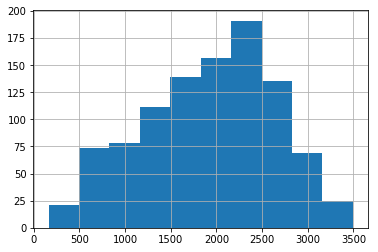

In [5]:
data['calc_ranges'].hist()

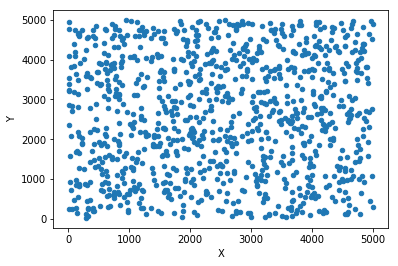

In [6]:
data.plot.scatter('X', 'Y')

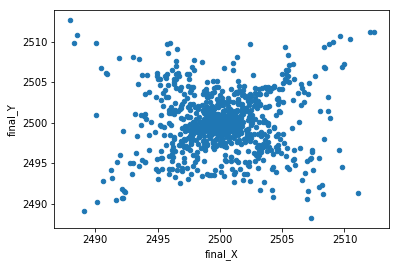

In [7]:
data.plot.scatter('final_X', 'final_Y')

Showing the effects of filtering on the data.

In [8]:
filter = data[(data.final_diff < 10) & (data.calc_ranges < 1500)]

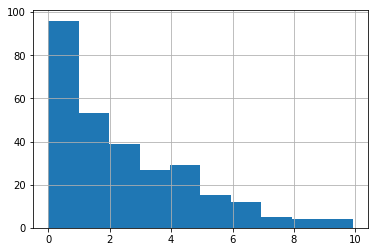

In [9]:
filter['final_diff'].hist()

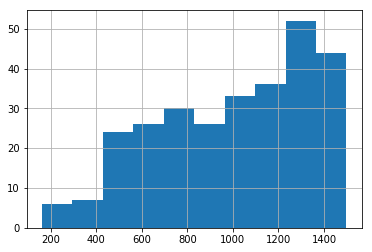

In [10]:
filter['calc_ranges'].hist()

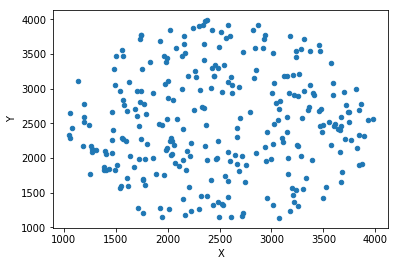

In [11]:
filter.plot.scatter('X', 'Y')

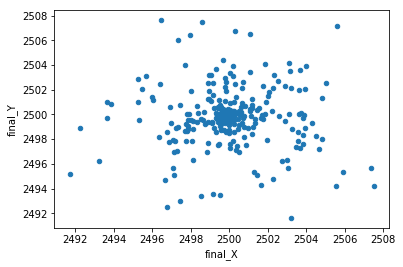

In [12]:
filter.plot.scatter('final_X', 'final_Y')

In [58]:
text_file = open("equations.py", "w")


print("def equations( guess ):", file=text_file)
print("\tx, y, z, r = guess", file=text_file)
print("\treturn (", file=text_file)

i=1

while i <= len(filter.index):
    print("\t\t(x - x",i,")**2 + (y - y",i,")**2 + (z - z",i,")**2 - (dist_",i," - r )**2", sep="", file=text_file)
  
    i=i+1
print("\t)",file=text_file)    
    
text_file.close()

In [60]:
from equations import equations